In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


In [85]:

def generate_random_indices(segments, num_rows):
    return np.random.randint(0, len(segments), num_rows)

# Customer segments
segment_list = [('Age', [20, 30, 40, 50, 60, 70, 80]),
    ('Gender', ['Male', 'Female']),
    ('Income', [50000, 60000, 70000, 80000, 90000, 100000]),
    ('Education', ['Associate\'s', 'Bachelor\'s', 'Master\'s', 'Doctorate']),
    ('Location', ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Seattle']),
    ('Purchase Frequency', [2, 3, 4, 5, 6, 7, 8]),
    ('Amount Spent', [3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]),
    ('Product Type', ['Electronics', 'Clothing', 'Home Goods', 'Beauty', 'Groceries']),
    ('Customer Satisfaction', ['Low', 'Medium', 'High']),
    ('Loyalty', ['Low', 'Medium', 'High', 'Very High']),
    ('Social Media Activity', ['Active', 'Passive'])
]

# number of rows to generate
num_rows = 1000

# generate random indices for each segment
indices = {}
for segment in segment_list:
    indices[segment[0]] = generate_random_indices(segment[1], num_rows)

data = []

# generate 1000 random rows of data
for i in range(num_rows):
    customer_id = i + 1
    age = age_segments[age_indices[i]]
    gender = gender_segments[gender_indices[i]]
    income = income_segments[income_indices[i]]
    education = education_segments[education_indices[i]]
    location = location_segments[location_indices[i]]
    purchase_frequency = purchase_frequency_segments[purchase_frequency_indices[i]]
    amount_spent = amount_spent_segments[amount_spent_indices[i]]
    product_type = product_type_segments[product_type_indices[i]]
    customer_satisfaction = customer_satisfaction_segments[customer_satisfaction_indices[i]]
    loyalty = loyalty_segments[loyalty_indices[i]]
    social_media_activity = social_media_activity_segments[social_media_activity_indices[i]]

    data.append([customer_id, age, gender, income, education, location, purchase_frequency, amount_spent, product_type, customer_satisfaction, loyalty, social_media_activity])


In [94]:
data[:3]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,cluster
0,1.0,20.0,90000.0,3.0,5000.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,2.0,30.0,50000.0,2.0,9000.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,3.0,50.0,80000.0,5.0,5000.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [87]:
age_indices[:5]

array([0, 1, 3, 4, 1])

In [88]:
dataframe = pd.DataFrame(data) 

dataframe.columns =['id', 'age', 'gender', 'income', 'education', 'location', 'purchase_frequency', 'amount_spent', 'product_type', 
              'customer_satisfaction', 'loyalty', 'social_media_activity']

dataframe

,id,age,gender,income,education,location,purchase_frequency,amount_spent,product_type,customer_satisfaction,loyalty,social_media_activity
0,1,20,Male,90000,Associate's,Chicago,3,5000,Clothing,Medium,Medium,Active
1,2,30,Male,50000,Associate's,Seattle,2,9000,Clothing,Low,Low,Active
2,3,50,Male,80000,Doctorate,Los Angeles,5,5000,Beauty,Medium,Very High,Active
3,4,60,Female,100000,Doctorate,New York,5,3000,Home Goods,Medium,Low,Passive
4,5,30,Female,90000,Associate's,New York,3,10000,Home Goods,Medium,Low,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,50,Male,70000,Bachelor's,Los Angeles,6,9000,Electronics,Medium,Low,Passive
996,997,30,Female,80000,Associate's,Chicago,3,7000,Home Goods,Medium,Low,Passive
997,998,60,Female,60000,Master's,New York,6,7000,Electronics,Low,Very High,Passive
998,999,20,Male,70000,Associate's,San Francisco,6,6000,Clothing,High,Low,Active


In [89]:
# Create instance 
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the data
one_hot = encoder.fit_transform(dataframe)

# The resulting one-hot encoding will be a sparse matrix

print(one_hot.toarray())

[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [90]:
# Separate numerical and categorical values
numerical_values = dataframe.select_dtypes(include=[np.number]).values
categorical_values = dataframe.select_dtypes(include=['object']).values

print("numerical values", "\n", numerical_values, "\n")
print("categorical values", "\n", categorical_values, "\n")

# One-hot encode categorical values
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(categorical_values).toarray()

print("one_hot_encoded", "\n", one_hot_encoded, "\n")

# Combine numerical and one-hot encoded categorical values
encoded = np.concatenate((numerical_values, one_hot_encoded), axis=1)

print("encoded", "\n", encoded, "\n")

numerical values 
 [[    1    20 90000     3  5000]
 [    2    30 50000     2  9000]
 [    3    50 80000     5  5000]
 ...
 [  998    60 60000     6  7000]
 [  999    20 70000     6  6000]
 [ 1000    70 90000     4  9000]] 

categorical values 
 [['Male' "Associate's" 'Chicago' ... 'Medium' 'Medium' 'Active']
 ['Male' "Associate's" 'Seattle' ... 'Low' 'Low' 'Active']
 ['Male' 'Doctorate' 'Los Angeles' ... 'Medium' 'Very High' 'Active']
 ...
 ['Female' "Master's" 'New York' ... 'Low' 'Very High' 'Passive']
 ['Male' "Associate's" 'San Francisco' ... 'High' 'Low' 'Active']
 ['Male' "Master's" 'New York' ... 'Low' 'High' 'Active']] 

one_hot_encoded 
 [[0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]] 

encoded 
 [[1.00e+00 2.00e+01 9.00e+04 ... 0.00e+00 1.00e+00 0.00e+00]
 [2.00e+00 3.00e+01 5.00e+04 ... 0.00e+00 1.00e+00 0.00e+00]
 [3.00e+00 5.00e+01 8.00e+04 ... 1.00e+00 1.00e+00 0.0

In [91]:
dataframe = pd.DataFrame(encoded) 


                 0          1             2         3           4    5    6   \
cluster                                                                        
0        506.796748  48.861789  75650.406504  5.105691  6500.00000  0.0  1.0   
1        497.165289  52.355372  74545.454545  5.016529  6471.07438  1.0  0.0   
2        497.184211  50.150376  74135.338346  5.007519  6650.37594  0.0  1.0   
3        501.069106  48.495935  73861.788618  5.178862  6560.97561  1.0  0.0   

               7         8         9   ...        20        21        22  \
cluster                                ...                                 
0        0.231707  0.272358  0.264228  ...  0.211382  0.321138  0.317073   
1        0.210744  0.214876  0.301653  ...  0.177686  0.404959  0.272727   
2        0.203008  0.225564  0.296992  ...  0.203008  0.345865  0.330827   
3        0.235772  0.288618  0.235772  ...  0.158537  0.394309  0.321138   

               23        24        25        26        27   28

C:\Users\Verneri\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


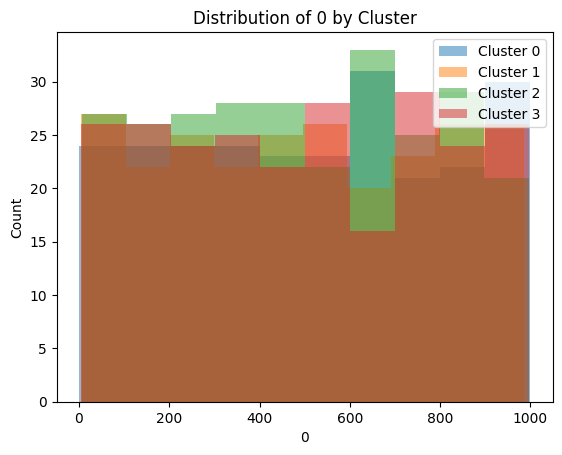

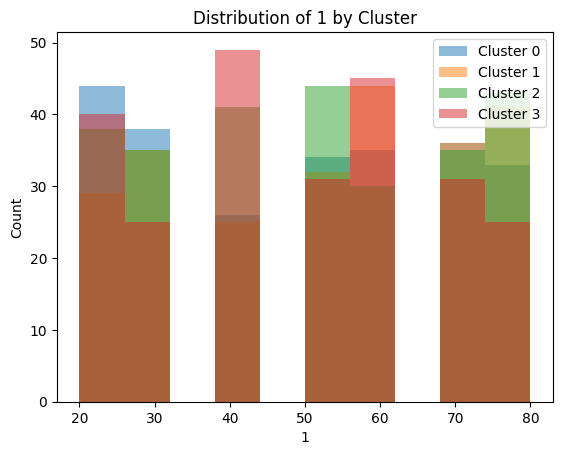

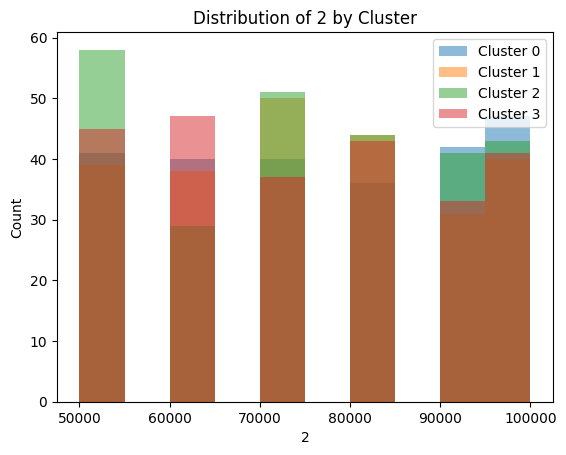

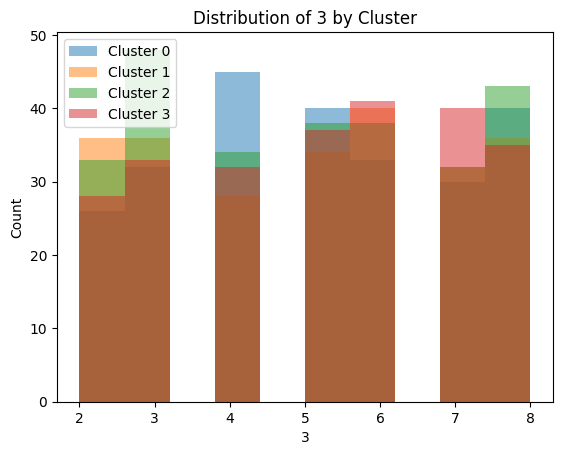

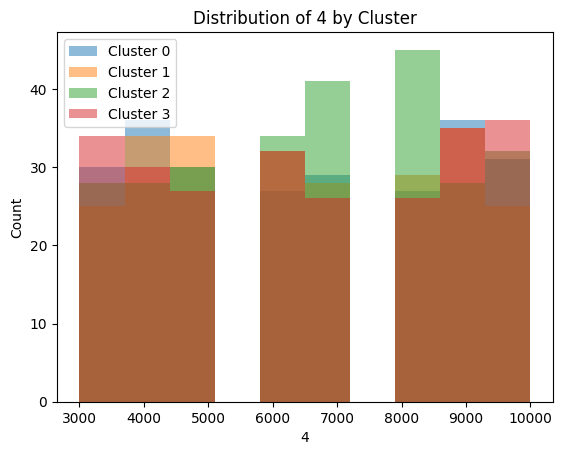

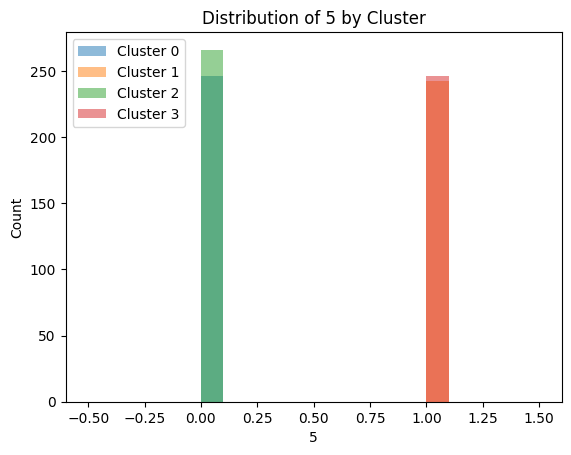

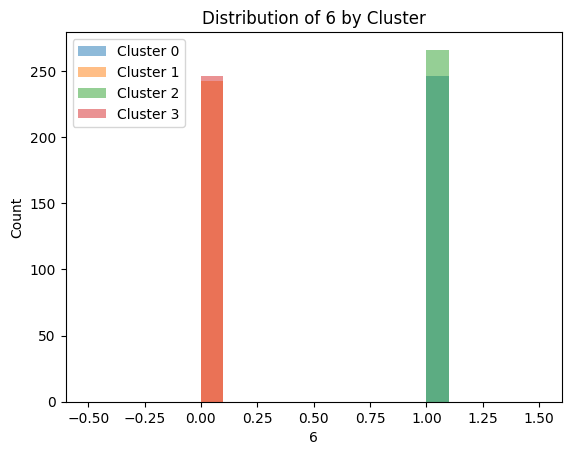

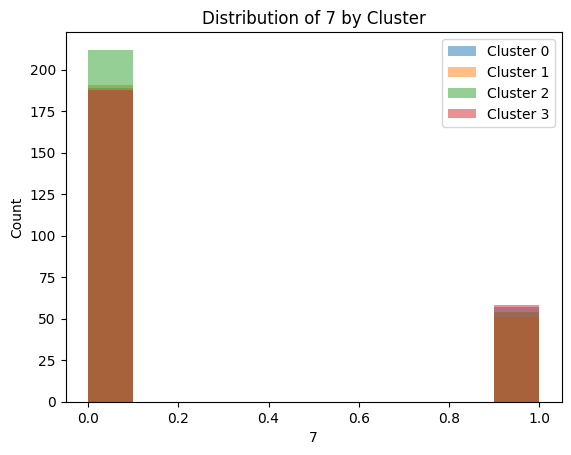

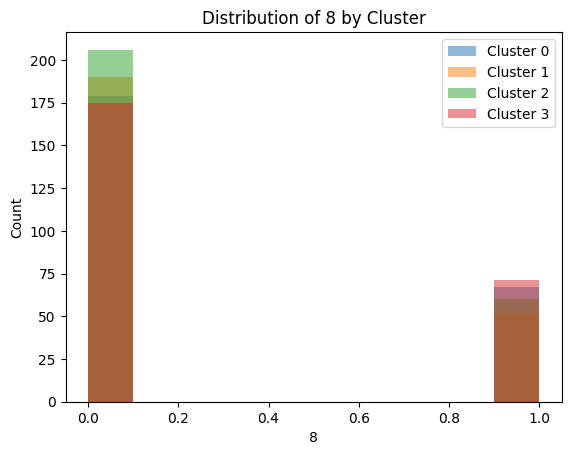

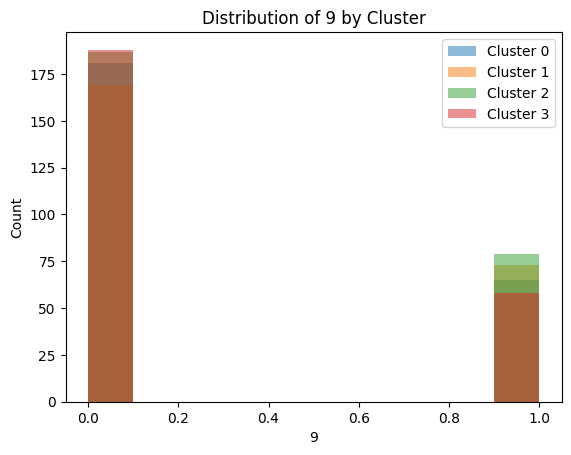

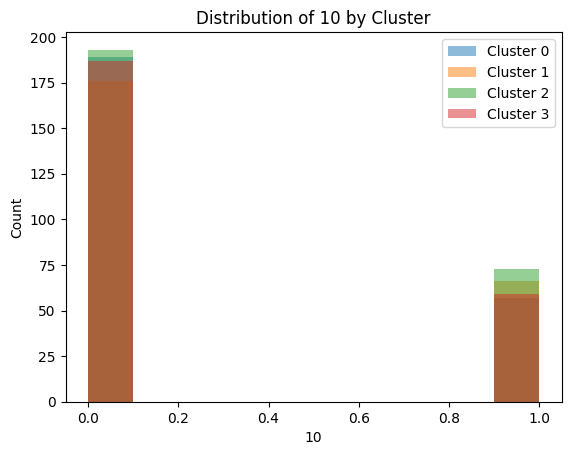

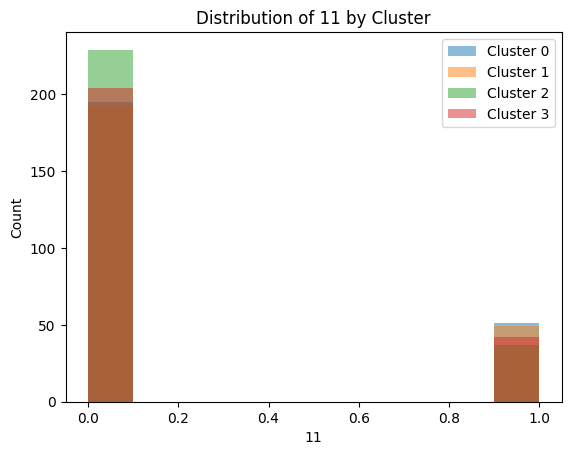

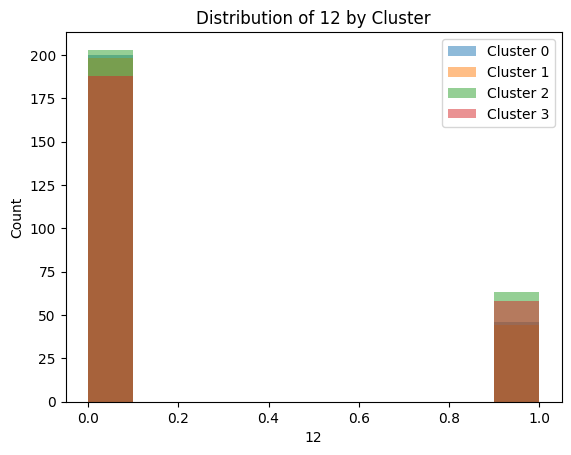

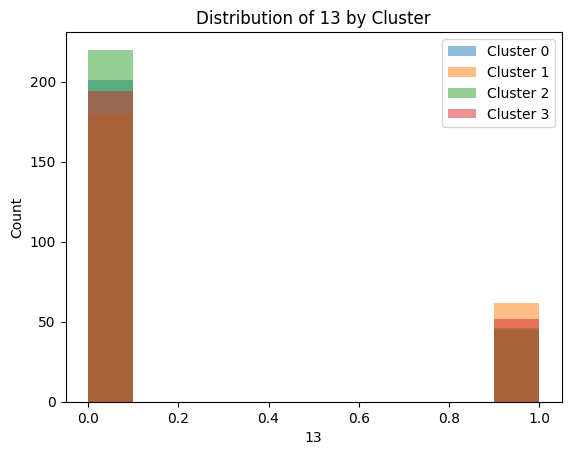

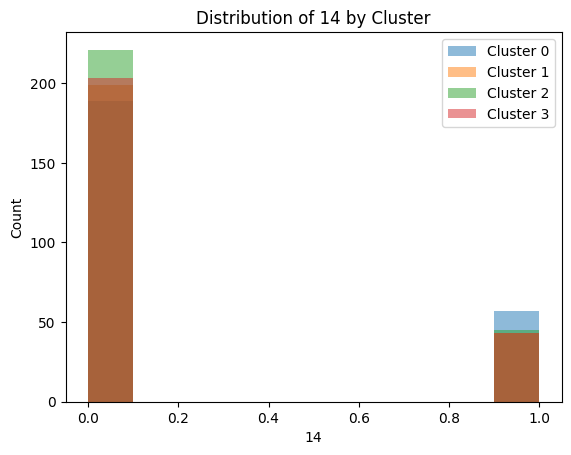

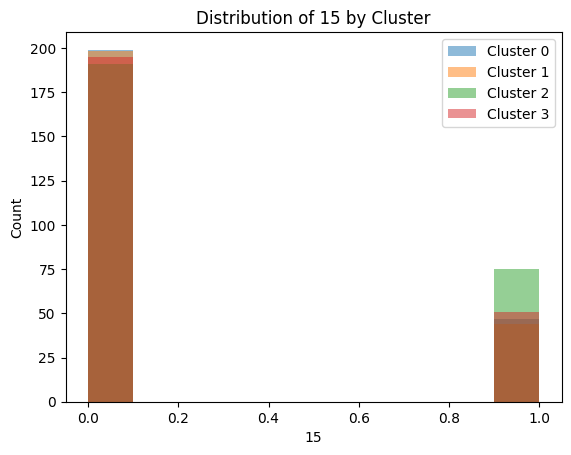

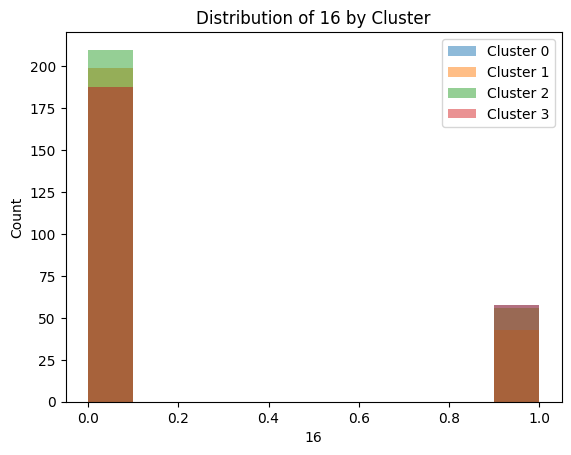

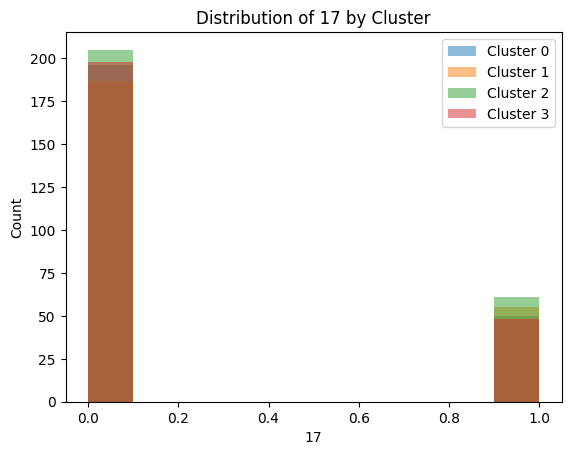

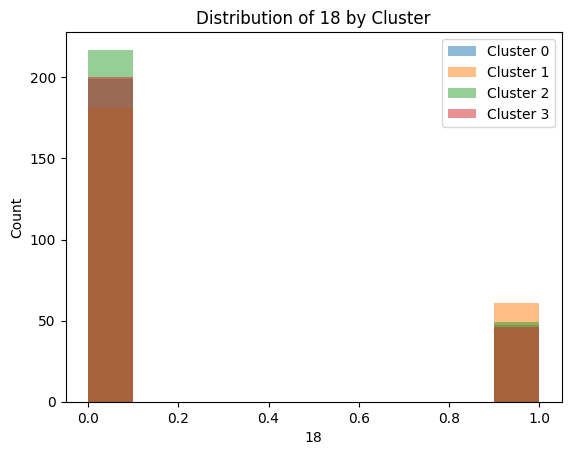

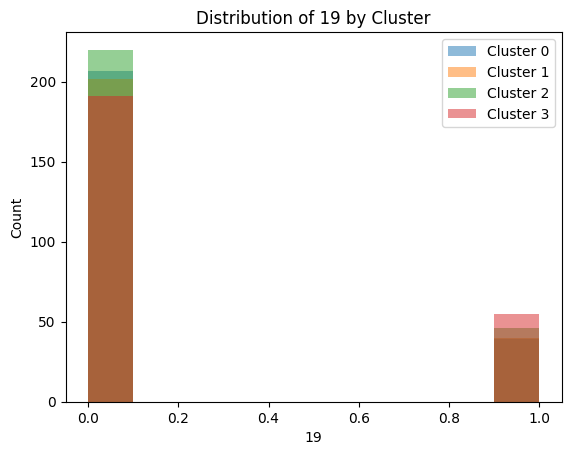

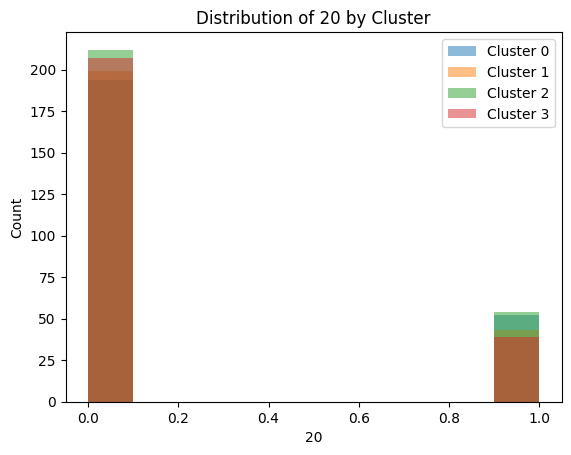

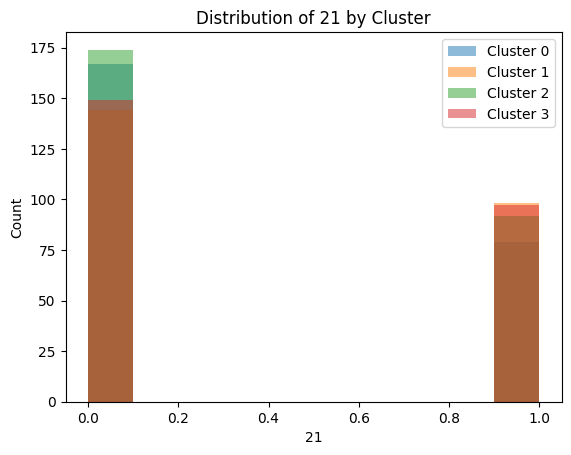

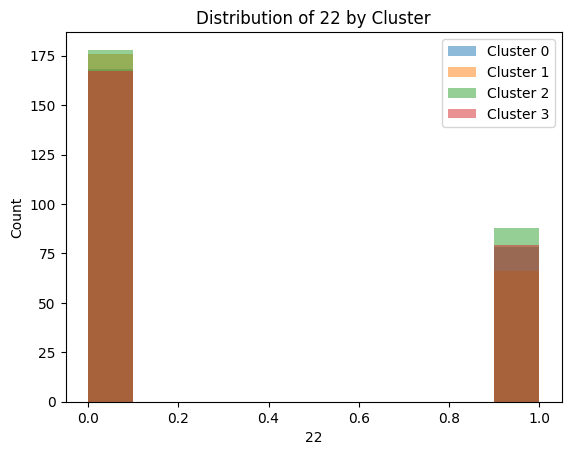

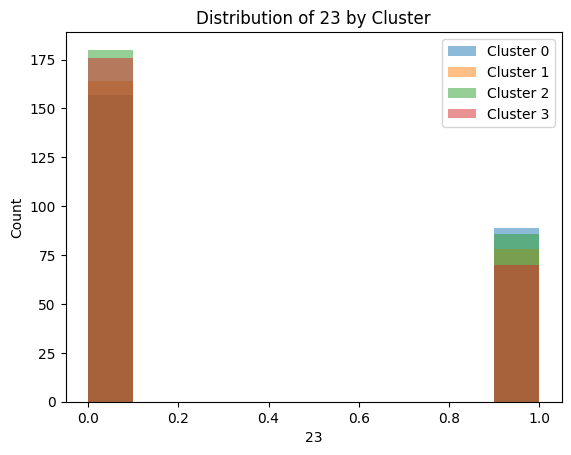

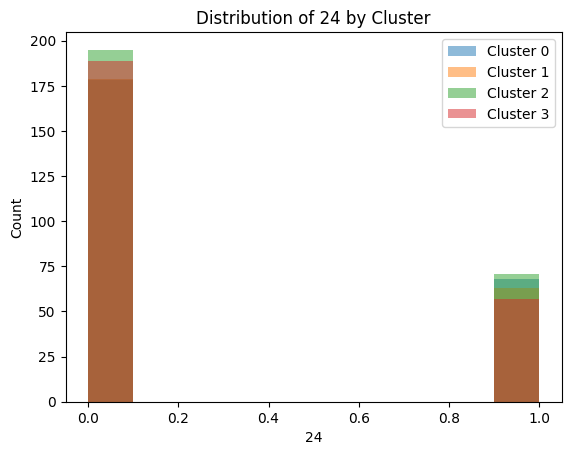

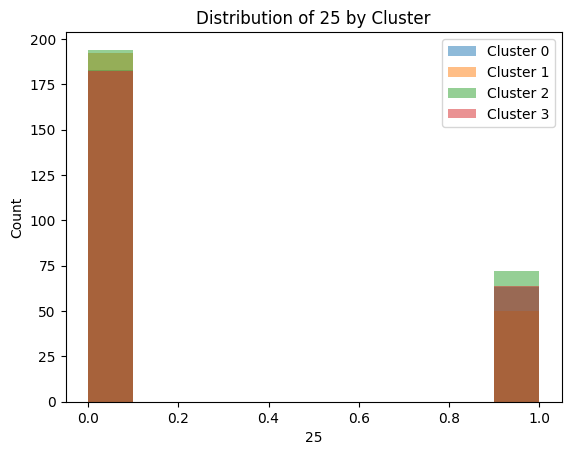

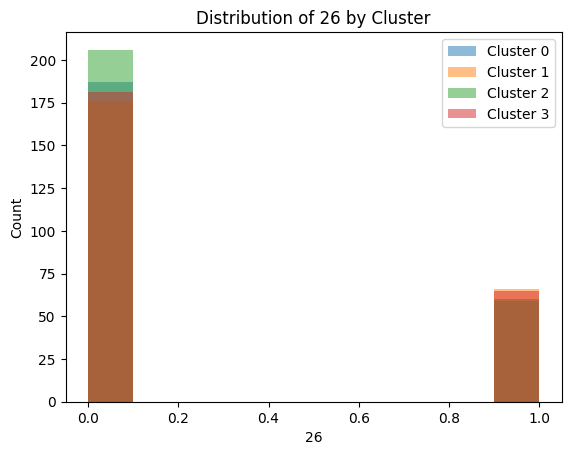

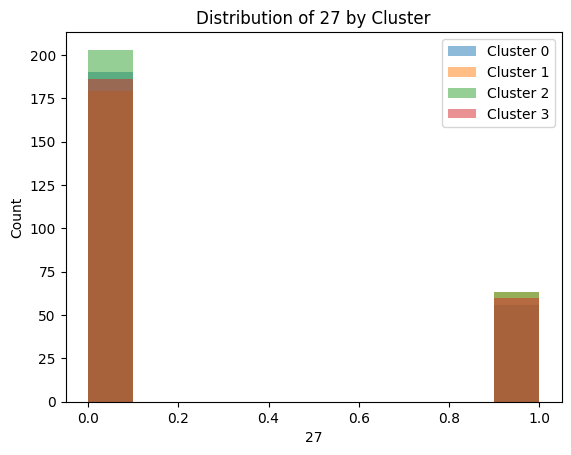

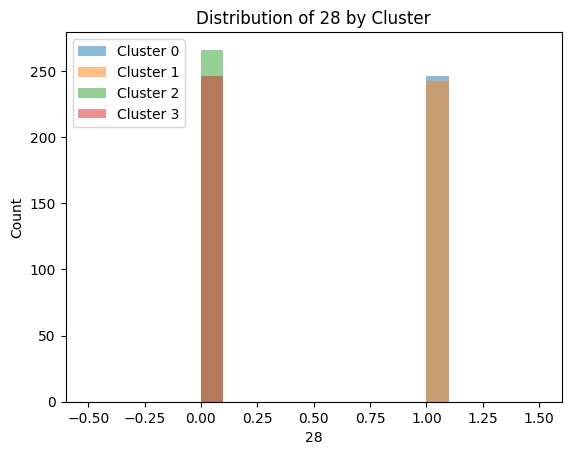

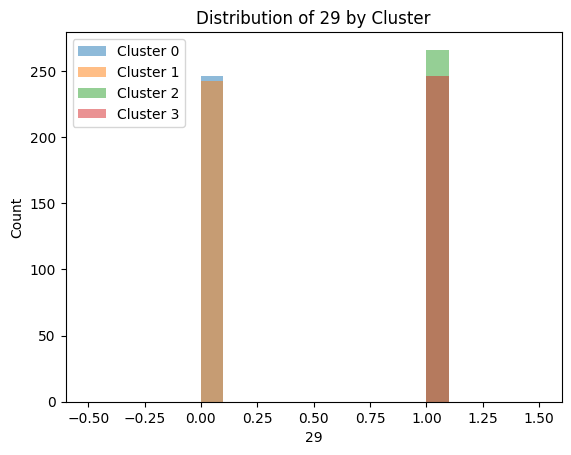

In [92]:
data = dataframe.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(data_scaled)
predictions = kmeans.predict(data_scaled)

# Add cluster predictions to the original data
data["cluster"] = predictions

# Analyze mean values of each variable by cluster
cluster_stats = data.groupby(["cluster"]).mean()
print(cluster_stats)

# Plot distributions of each variable by cluster
for col in data.columns[:-1]:
    plt.figure()
    plt.hist(data[data["cluster"] == 0][col], alpha=0.5, label="Cluster 0")
    plt.hist(data[data["cluster"] == 1][col], alpha=0.5, label="Cluster 1")
    plt.hist(data[data["cluster"] == 2][col], alpha=0.5, label="Cluster 2")
    plt.hist(data[data["cluster"] == 3][col], alpha=0.5, label="Cluster 3")
    plt.legend()
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Distribution of {} by Cluster".format(col))

plt.show()


# the clusters seem random and thats to be expected because the data generated is completely random
# an interesting challenge next would be to create semi random data, so that it emulates real data by showing clear clusters
# but the data is otherwise random and not collected from the real world

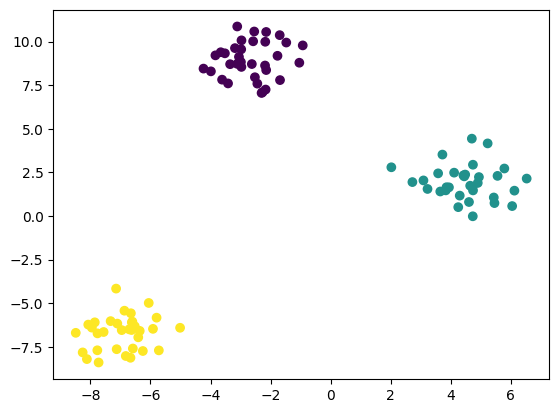

In [93]:
# semi-random data with 3 clear clusters
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
